Unsupervised learning - Clustering

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
X = pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
y = df['label']
n_y = len(y.unique()) #number of different labels

Hierarchical Clustering

In [3]:
parameters = {'ward', 'complete', 'average', 'single'}
labels = []

for param in parameters:
    aggC = AgglomerativeClustering(n_clusters=n_y, linkage=param)
    labels.append(aggC.fit_predict(X))

plt.figure(figsize=(6, 3.5))
plt.plot([p for p in parameters], [silhouette_score(X, label) for label in labels])
plt.title('Agglomerative Clustering silhouette score based on linkage parameter changes')
plt.grid()
plt.show()

plt.figure(figsize=(6, 3.5))
plt.plot([p for p in parameters], [rand_score(np.ravel(y), label) for label in labels])
plt.title('Agglomerative Clustering Range Index score based on linkage parameter changes')
plt.grid()
plt.show()

plt.figure(figsize=(6, 3.5))
plt.plot([p for p in parameters], [adjusted_rand_score(np.ravel(y), label) for label in labels])
plt.title('Agglomerative Clustering Adjusted Range Index score based on linkage parameter changes')
plt.grid()
plt.show()


: 

With hierarchical clustering the silhouette score reach 0.9 that is the highest one, but at the same time the rand index score and adjusted rand index score have the lowest values (more or less 0, remember that RI and ARI are supervised learning metric for cluster evaluation and they represent "accuracy" in respect of the label of the dataset) in comparison with the other clustering algorithm evaluated in the study. 

KMeans

In [7]:
kmeans_results = []

for k in range (int(0.5*n_y), int(1.5*n_y)):
    results = KMeans(n_clusters=k, init='k-means++', random_state=None, n_init=1).fit(X)
    kmeans_results.append(results)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].plot([k for k in range(int(0.5*n_y), int(1.5*n_y))], [result.inertia_ for result in kmeans_results])
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Clustering error")
axs[0].set_yscale('log')
axs[0].grid(True)

axs[1].plot([k for k in range(int(0.5*n_y), int(1.5*n_y))], [silhouette_score(X, result.labels_) for result in kmeans_results])
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Silhouette score")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [4]:
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=None, n_init=1)
result = kmeans.fit(X)
labels = result.labels_
print(f'Silhouette score for KMeans cluster algorithm is {silhouette_score(X, labels)}')
print(f'Range Index scor for KMeans cluster algorithm is {rand_score(np.ravel(y), labels)}')
print(f'Adjusted Range Index score for KMeans cluster algorithm is {adjusted_rand_score(np.ravel(y), labels)}')
print(f'Clustering error: {result.inertia_}')

Silhouette score for KMeans cluster algorithm is 0.48577855206962056
Range Index scor for KMeans cluster algorithm is 0.7851581539332553
Adjusted Range Index score for KMeans cluster algorithm is 0.25707892145182815
Clustering error: 1274703.9963002605


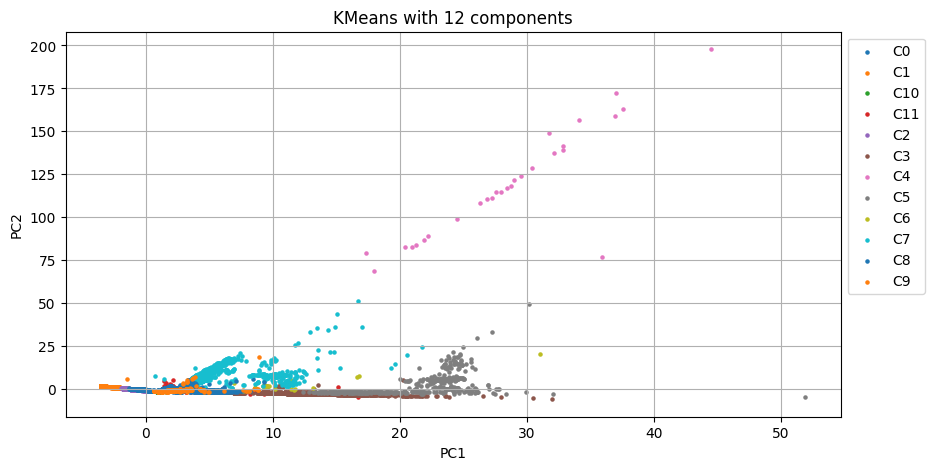

In [5]:
cluster_df = pd.DataFrame(X[:,:3])
cluster_df['cid_KM'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(cluster_df.cid_KM):
    subdf = cluster_df[cluster_df.cid_KM == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('KMeans with 12 components')
ax.grid()

Number of cluster selection: we evaluate the proper number of clusters on the silhouette score in a validation computing the silhouette score for differents number cluster of parameters for each clustering algorithm chosen

Gaussian Mixture

Best number of clusters: 15 with corresponding silhouette score: 0.5350487075886486


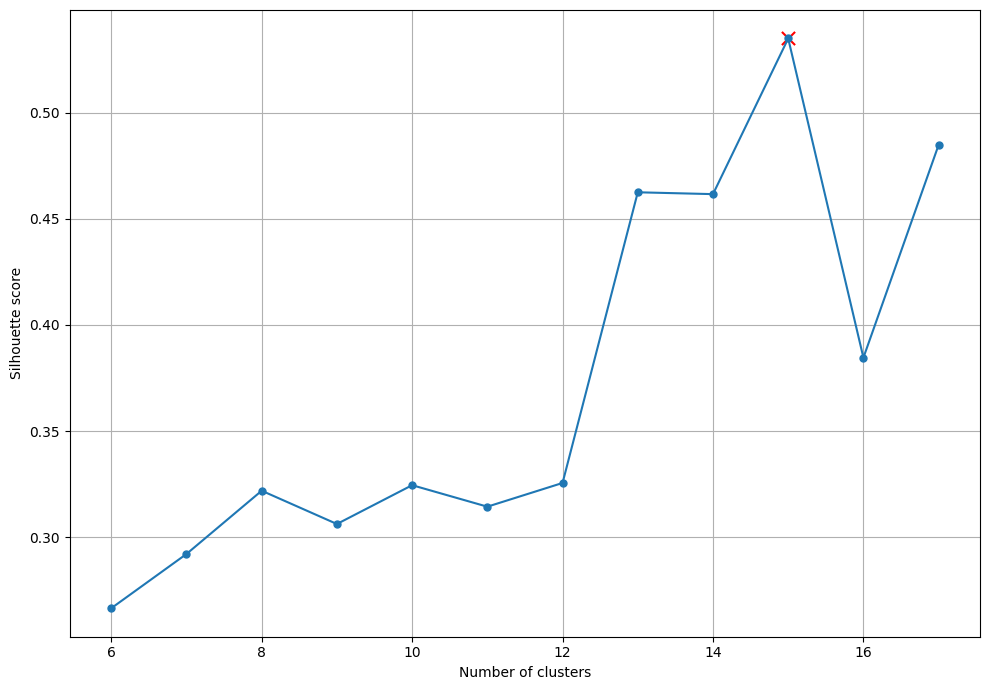

In [7]:
n_cluster = []
sh_scores = []

for n in range(int(n_y / 2), int(1.5 * n_y)):
    gmm = GaussianMixture(n_components=n)
    labels = gmm.fit_predict(X)
    n_cluster.append(n)
    sh_scores.append(silhouette_score(X, labels))

best_sh = np.max(sh_scores)
best_n = n_cluster[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

plt.figure(figsize=(10, 7))

plt.plot(n_cluster, sh_scores, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 

plt.tight_layout()
plt.show()

In [18]:
best_n = 15

In [22]:
pca_result =pd.read_csv('pca_dataframe.csv')
X = pca_result.to_numpy()
gmm = GaussianMixture(n_components=15)
labels = gmm.fit_predict(X)

In [ ]:
print(f'Silhouette score for GMM cluster algorithm is {silhouette_score(X, labels)}')
print(f'Rand Index score for GMM cluster algorithm is {rand_score(np.ravel(y), labels)}')
print(f'Adjusted Rand Index GMM for KMeans cluster algorithm is {adjusted_rand_score(np.ravel(y), labels)}')

Silhouette score for GMM cluster algorithm is 0.35579807862516233
Rand Index score for GMM cluster algorithm is 0.6985822903036555
Adjusted Rand Index GMM for KMeans cluster algorithm is 0.15716911434166786


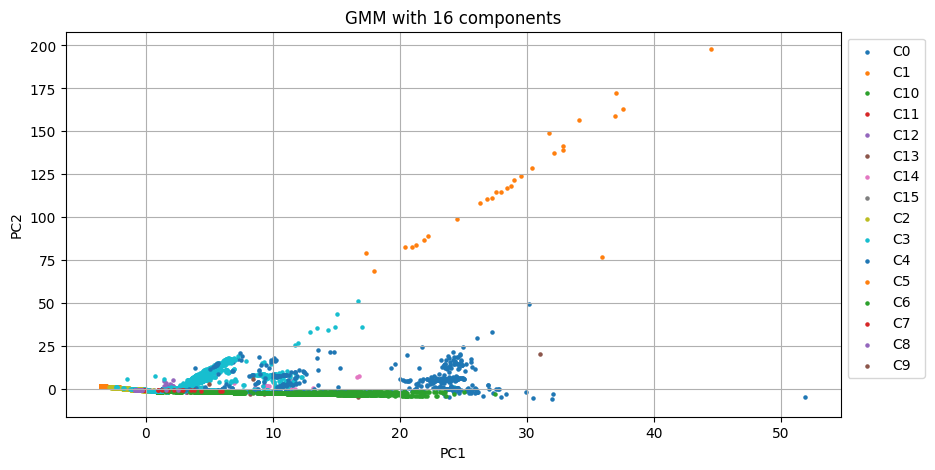

In [7]:
cluster_df['cid_gmm'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(cluster_df.cid_gmm):
    subdf = cluster_df[cluster_df.cid_gmm == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'GMM with {best_n} components')
ax.grid()

DBSCAN

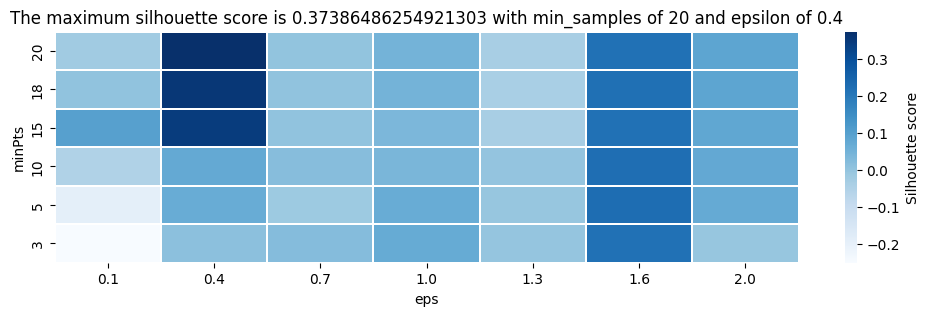

In [15]:
sh_scores =[]
mins = [3, 5, 10, 15, 18, 20]
epsilon = [0.1, 0.4, 0.7, 1, 1.3, 1.6, 2]

labels = []
for eps in epsilon:
    for min in mins:
        dbscan = DBSCAN(eps=eps, min_samples=min)
        labels = dbscan.fit_predict(X)
        sh_scores.append((eps, min, silhouette_score(X, labels)))

gs = pd.DataFrame(sh_scores, columns=['eps', 'minPts', 'sh'])
gs = pd.pivot_table(gs, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

plt.figure(figsize=(12,3))
max_ss = gs.max().max()
mins_max_ss = gs.stack().idxmax()[0]
eps_max_ss = gs.stack().idxmax()[1]
plt.title(f'The maximum silhouette score is {max_ss} with min_samples of {mins_max_ss} and epsilon of {eps_max_ss}')
sns.heatmap(gs, cmap='Blues', cbar_kws={'label':'Silhouette score'}, linewidths=.005)
plt.gca().invert_yaxis()
plt.show()

In [8]:
eps_max_ss = 0.4
mins_max_ss = 20

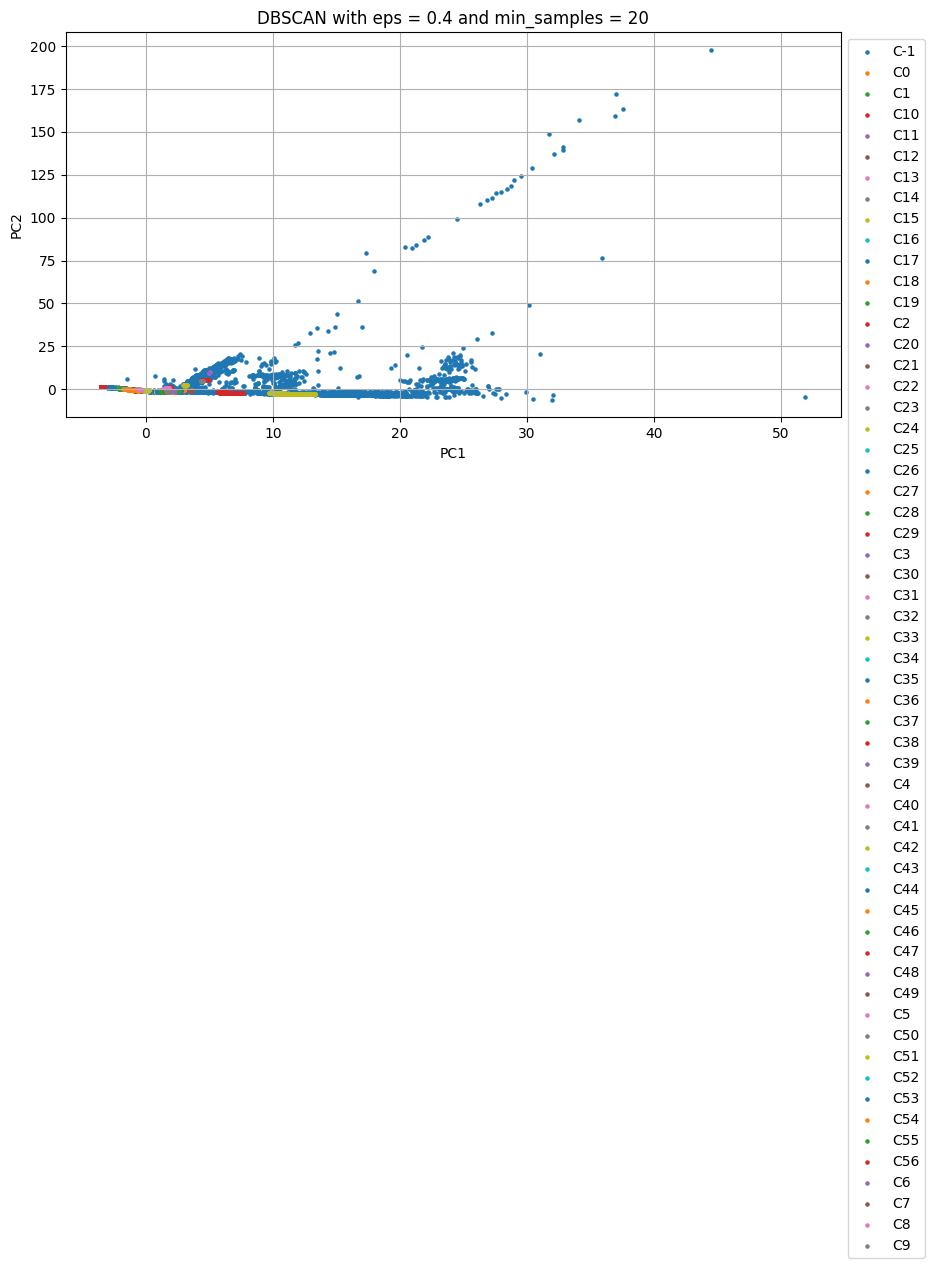

In [9]:
n_samples, n_features = df.shape
labels = []
dbscan = DBSCAN(eps=eps_max_ss, min_samples=mins_max_ss)
labels = dbscan.fit_predict(X)

print(f'Silhouette score for GMM cluster algorithm is {silhouette_score(X, labels)}')
print(f'Rand Index score for GMM cluster algorithm is {rand_score(np.ravel(y), labels)}')
print(f'Adjusted Rand Index GMM for KMeans cluster algorithm is {adjusted_rand_score(np.ravel(y), labels)}')

In [ ]:

cluster_df['cid_dbscan'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(cluster_df.cid_dbscan):
    subdf = cluster_df[cluster_df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'DBSCAN with eps = {eps_max_ss} and min_samples = {mins_max_ss}')
plt.show()


In [10]:
cluster_df

,0,1,2,cid_KM,cid_gmm,cid_dbscan
0,-0.478653,-0.589533,0.998409,C2,C7,C-1
1,-0.464128,-0.267606,0.902600,C0,C2,C0
2,-0.523195,-0.620103,1.268103,C2,C7,C1
3,-0.459103,-0.568340,1.348160,C2,C7,C1
4,-0.490045,-0.592144,1.310972,C2,C7,C1
...,...,...,...,...,...,...
64234,-0.753011,-0.575134,0.697743,C0,C2,C28
64235,0.190764,-0.564125,1.542294,C2,C15,C42
64236,-0.722891,-0.590632,0.743384,C0,C2,C28
64237,0.191507,-0.546475,1.541808,C2,C15,C42


In [11]:
cluster_df['flow'] = df['label']
cluster_df

,0,1,2,cid_KM,cid_gmm,cid_dbscan,flow
0,-0.478653,-0.589533,0.998409,C2,C7,C-1,ddos_dns
1,-0.464128,-0.267606,0.902600,C0,C2,C0,ddos_dns
2,-0.523195,-0.620103,1.268103,C2,C7,C1,ddos_dns
3,-0.459103,-0.568340,1.348160,C2,C7,C1,ddos_dns
4,-0.490045,-0.592144,1.310972,C2,C7,C1,ddos_dns
...,...,...,...,...,...,...,...
64234,-0.753011,-0.575134,0.697743,C0,C2,C28,ddos_udp_lag
64235,0.190764,-0.564125,1.542294,C2,C15,C42,ddos_udp_lag
64236,-0.722891,-0.590632,0.743384,C0,C2,C28,ddos_udp_lag
64237,0.191507,-0.546475,1.541808,C2,C15,C42,ddos_udp_lag


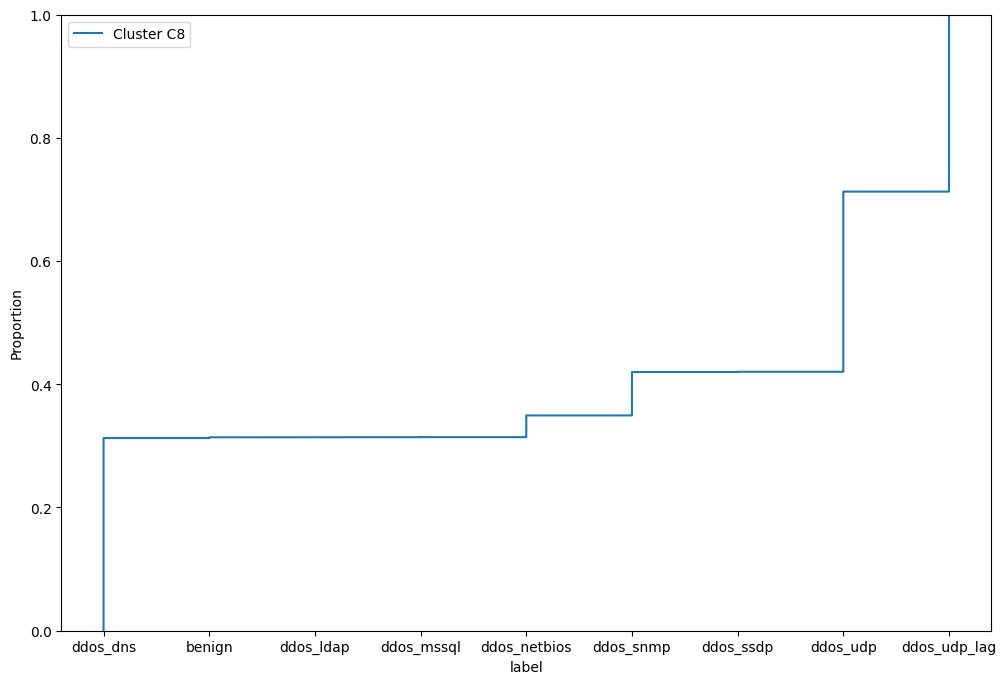

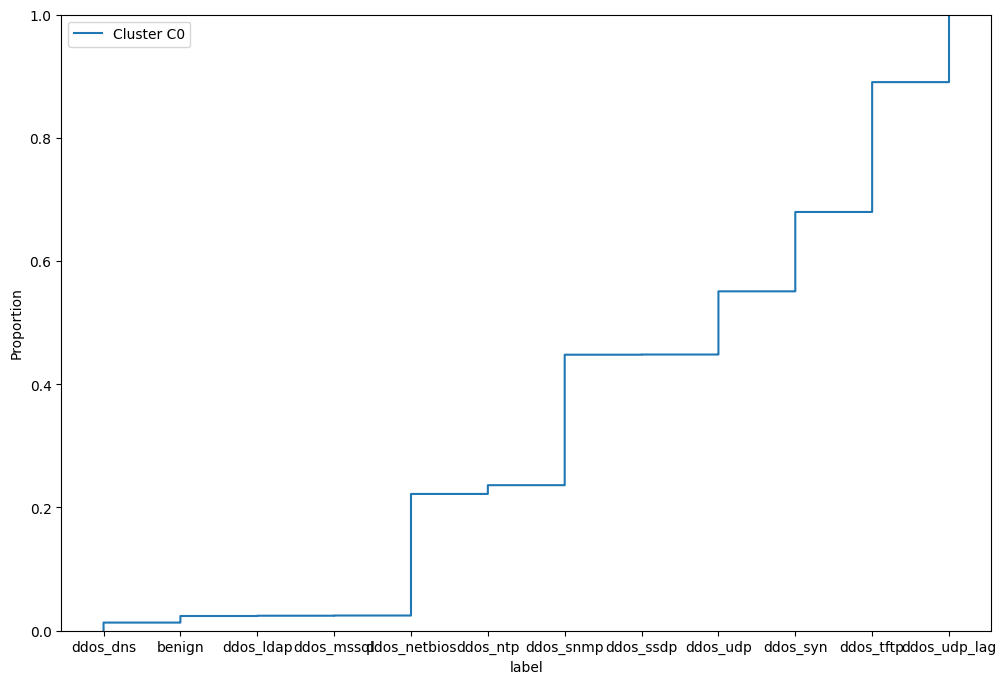

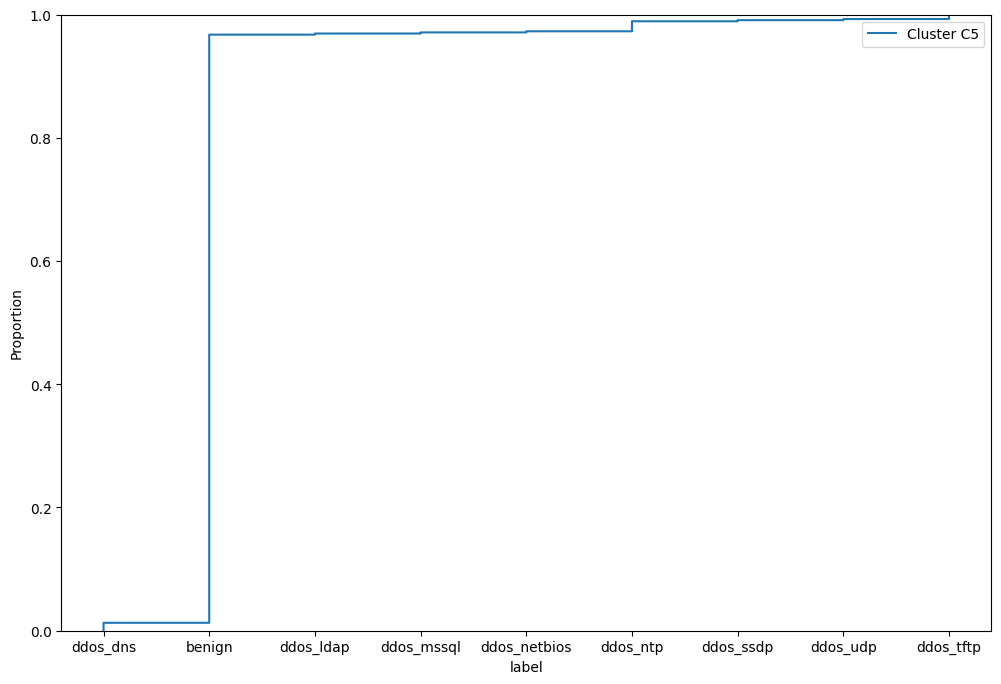

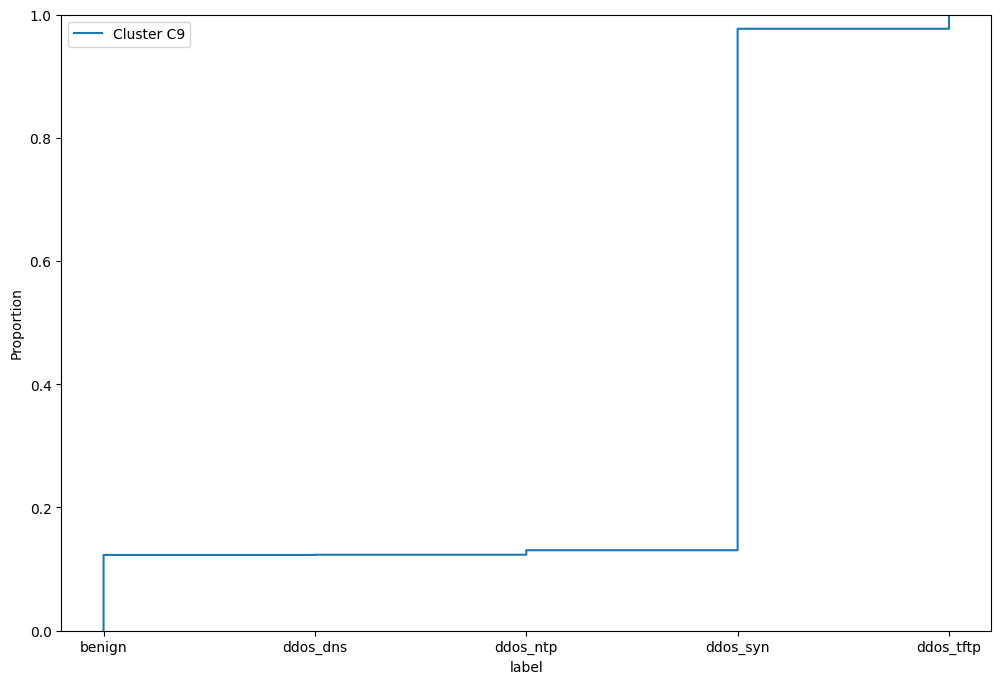

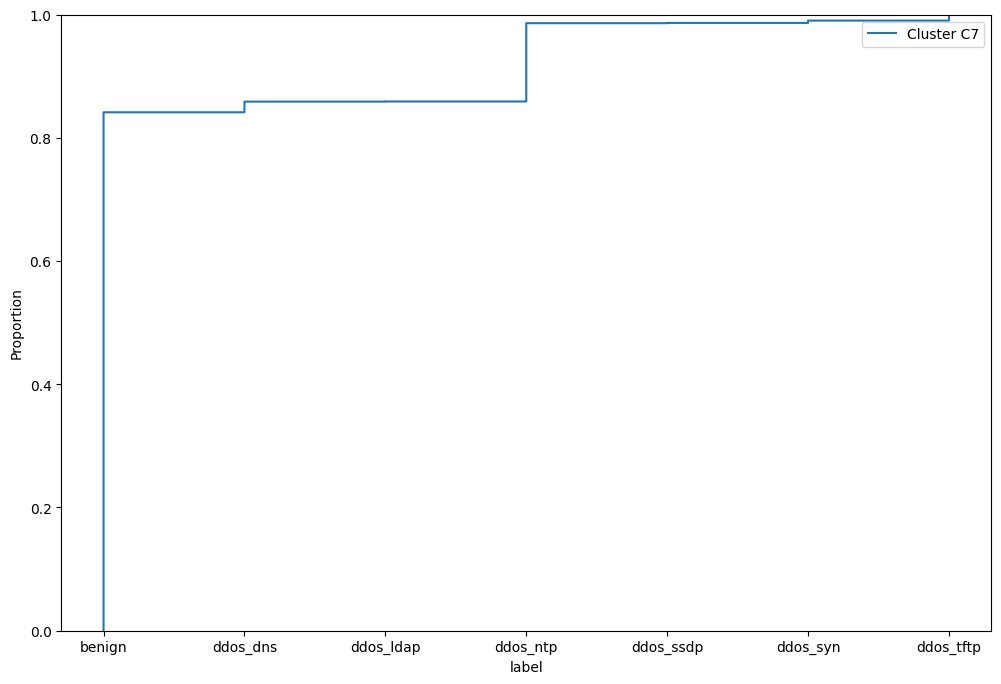

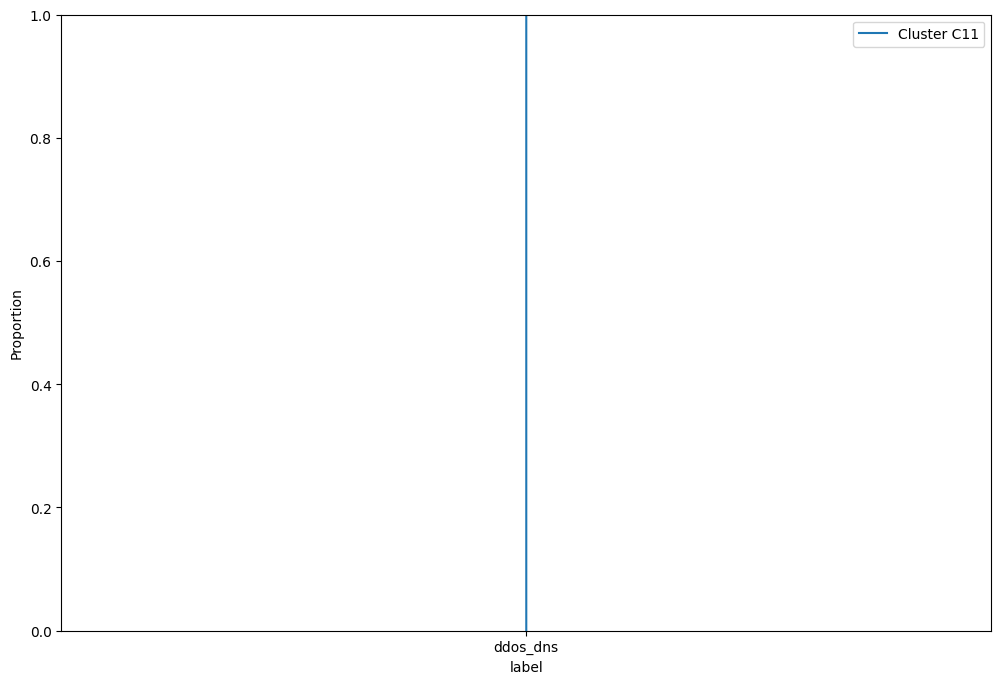

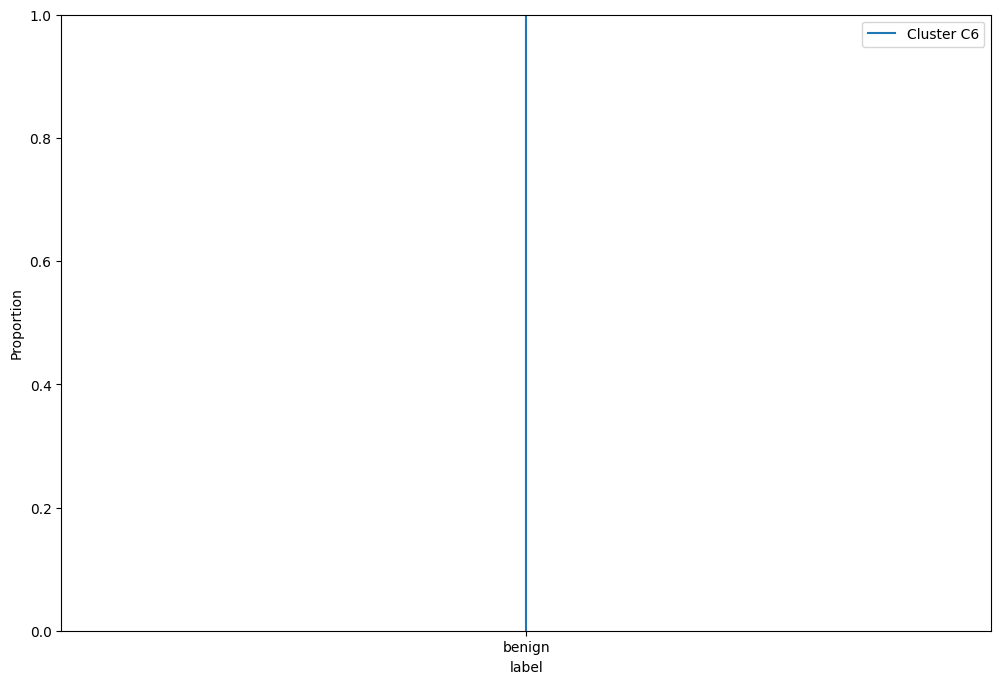

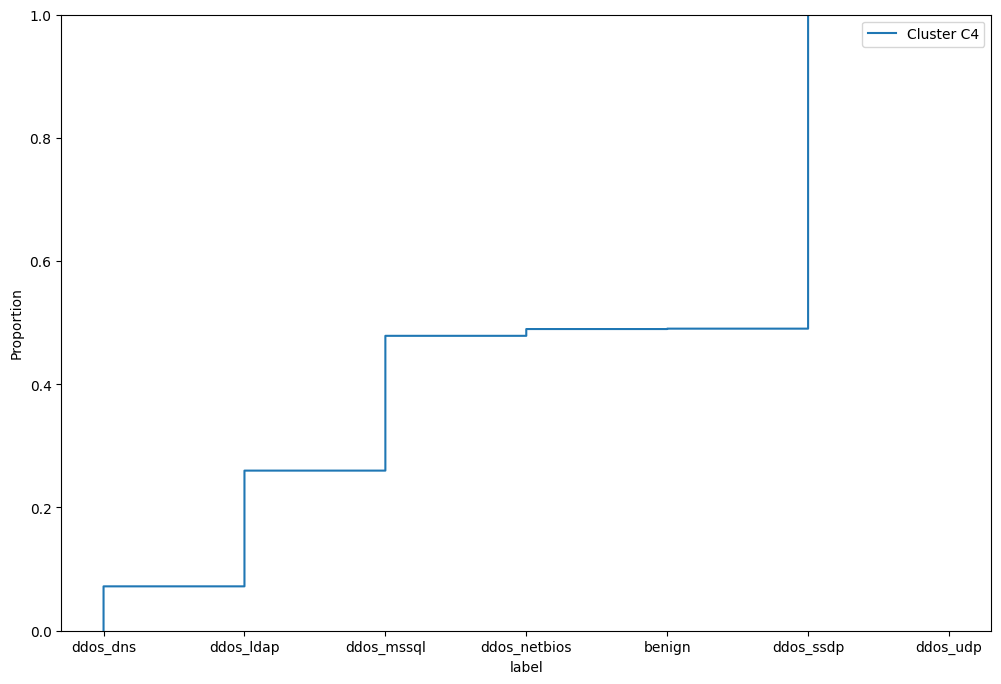

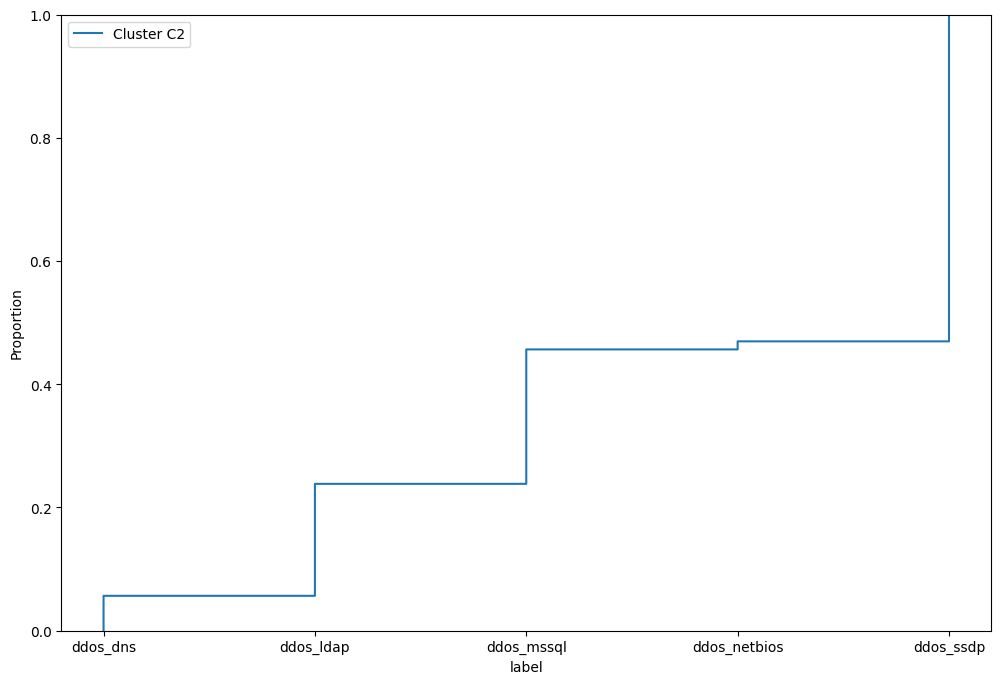

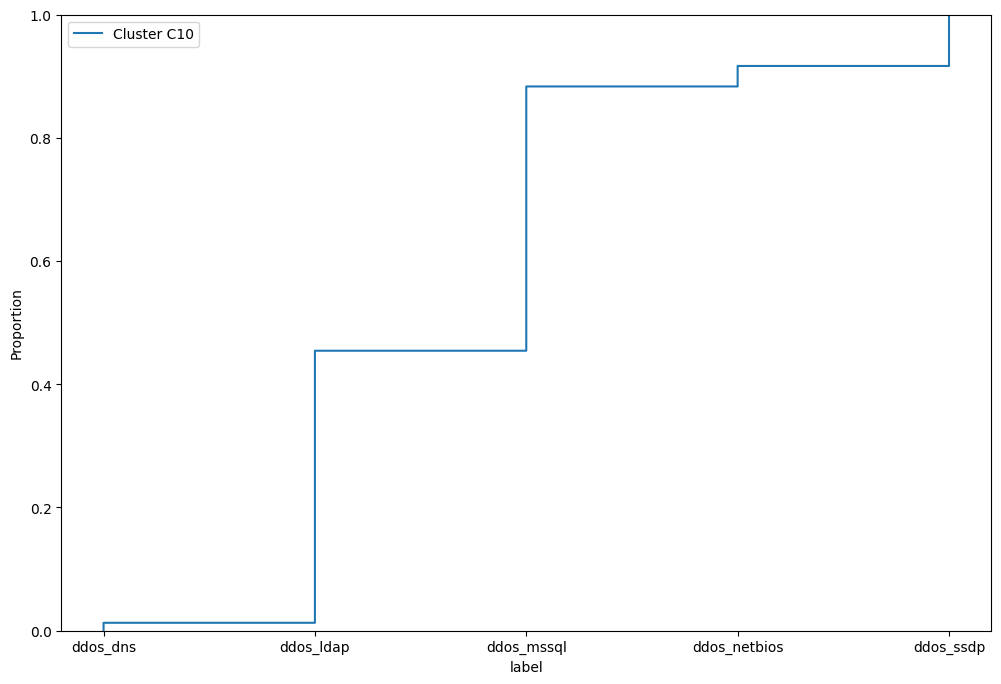

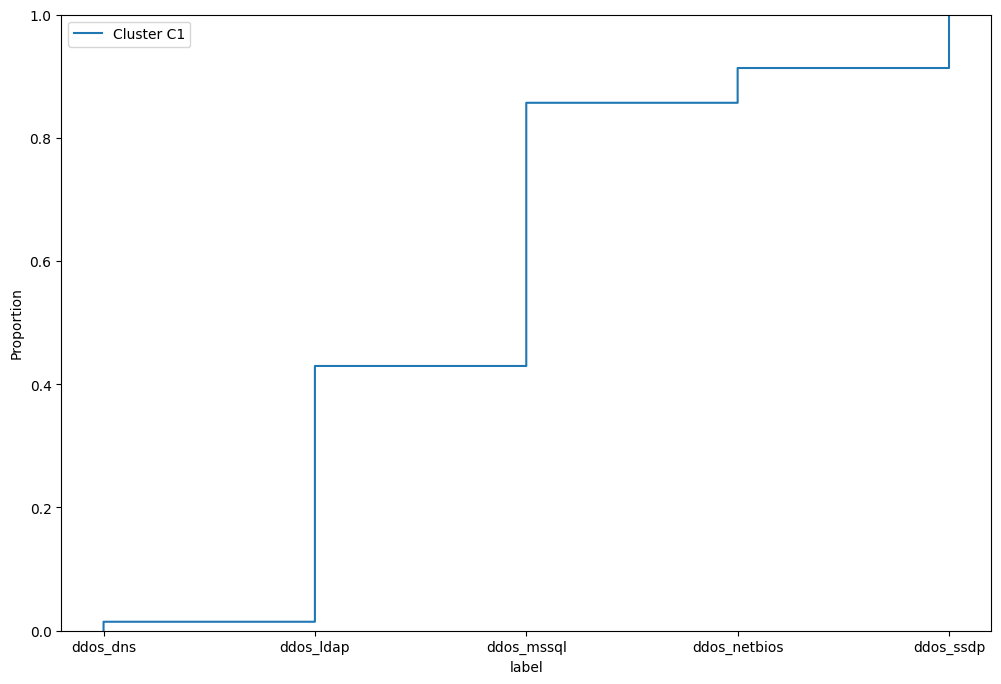

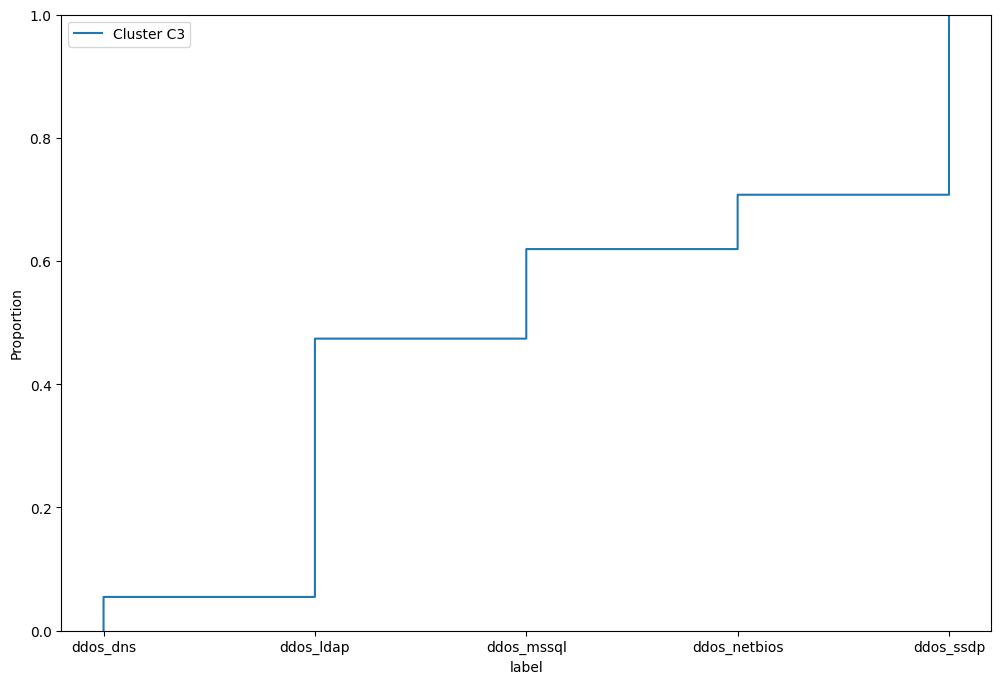

In [33]:
data = pd.DataFrame({
    'label': cluster_df['flow'],
    'Cluster': cluster_df['cid_KM']
})

# Plot ECDFs for each feature within each cluster

for cluster in data['Cluster'].unique():
    plt.figure(figsize=(12, 8))
    subset = data[data['Cluster'] == cluster]
    ecdf = sns.ecdfplot(subset['label'], label=f'Cluster {cluster}')

    plt.legend()
plt.show()

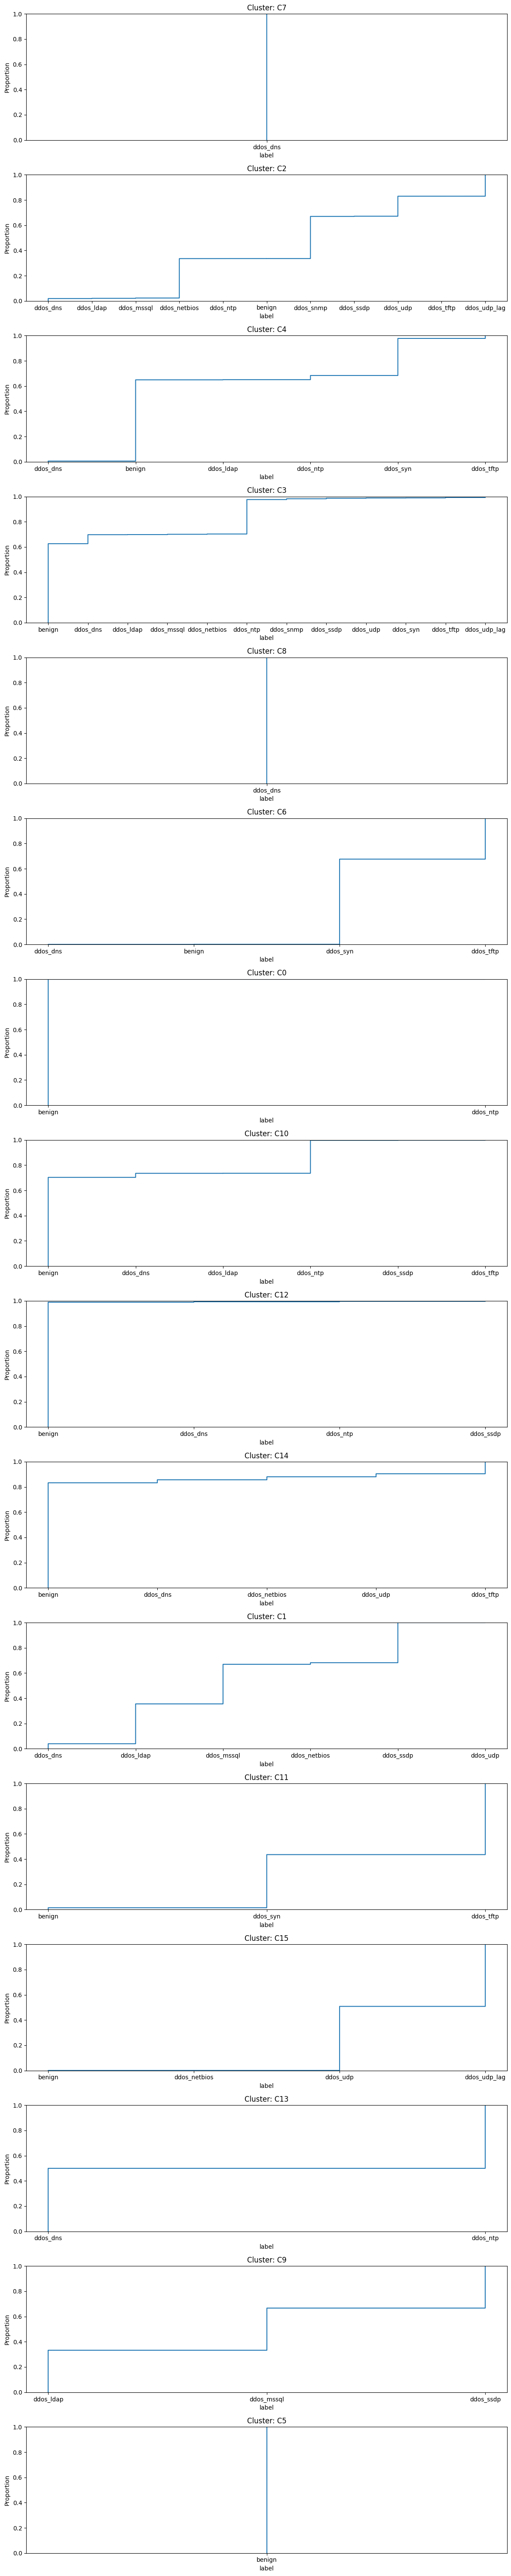

In [32]:
data = pd.DataFrame({
    'label': cluster_df['flow'],
    'Cluster': cluster_df['cid_gmm']
})
fig, axs = plt.subplots(len(data['Cluster'].unique()), 1, figsize=(12, 60))

for i, cluster in enumerate(data['Cluster'].unique()):
    subset = data[data['Cluster'] == cluster]
    sns.ecdfplot(subset['label'], label=f'Cluster {cluster}', ax=axs[i])
    axs[i].set_title(f'Cluster: {cluster}')
    plt.tight_layout()

plt.show()

In [19]:
cluster_df[2] = X[:,2]


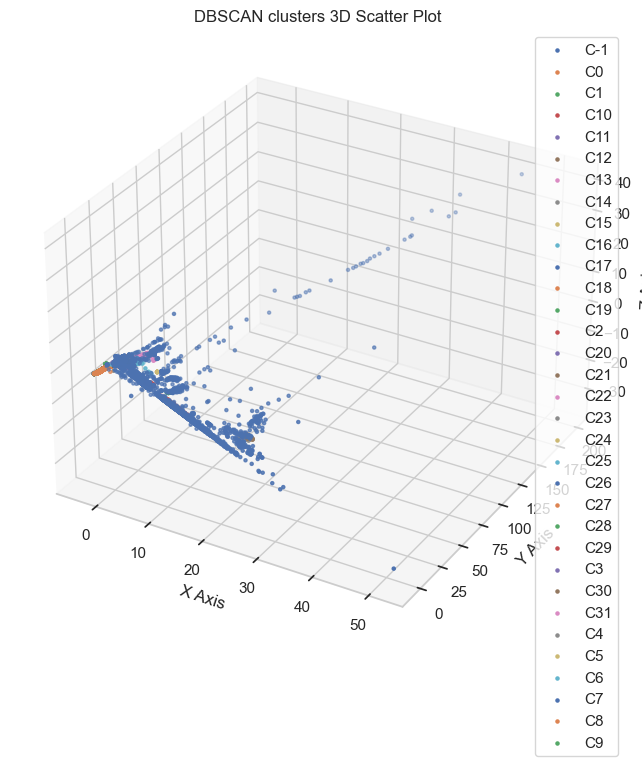

In [20]:
sns.set(style="whitegrid")
# Create a 3D scatter plot with color-coded clusters using Seaborn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(cluster_df.cid_dbscan):
    subdf = cluster_df[cluster_df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('DBSCAN clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()